## Import Libraries and Data

In [2]:
import pandas as pd
import numpy as np

import os
import tarfile
from datetime import datetime

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [29]:
pd.options.display.max_colwidth = 150 ###
file = "/Users/adrianacuppuleri/Desktop/GITHUB ADRIANA/un_general_debate/data/un-general-debates.csv"
df = pd.read_csv(file)
df.sample(2, random_state=53)

,session,year,country,text
3871,42,1987,HND,"﻿On behalf of the Government of Honduras I extend to you, Sir, sincere congratulations on your election as President of the forty-second session o..."
4697,35,1980,THA,﻿My delegation takes pleasure in extending to Mr. Riidiger von Wechmar its sincere congratulations on his unanimous election to the presidency of ...


## EDA

Summary Statistics

In [9]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7507 entries, 0 to 7506
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   session  7507 non-null   int64 
 1   year     7507 non-null   int64 
 2   country  7507 non-null   object
 3   text     7507 non-null   object
dtypes: int64(2), object(2)
memory usage: 234.7+ KB
None


In [30]:
df['length'] = df['text'].str.len()
df.describe().T

,count,mean,std,min,25%,50%,75%,max
session,7507.0,49.610763,12.892155,25.0,39.0,51.0,61.0,70.0
year,7507.0,1994.610763,12.892155,1970.0,1984.0,1996.0,2006.0,2015.0
length,7507.0,17967.281604,7860.038463,2362.0,12077.0,16424.0,22479.5,72041.0


In [12]:
df['country'].describe(include='0')

count     7507
unique     199
top        IRN
freq        46
Name: country, dtype: object

Check for Missing Data

Plotting Value Distribuition

<Axes: >

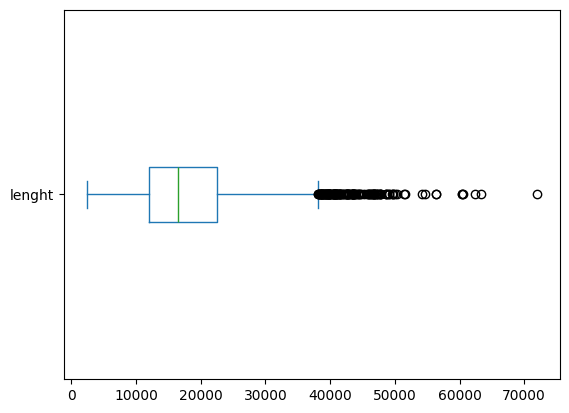

In [14]:
df['length'].plot(kind='box', vert=False)

<Axes: ylabel='Frequency'>

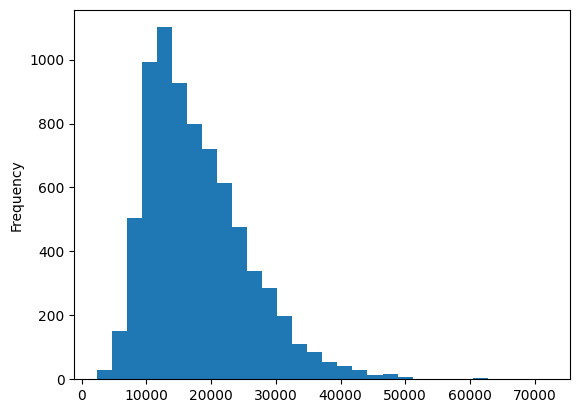

In [15]:
df['length'].plot(kind='hist', bins=30)

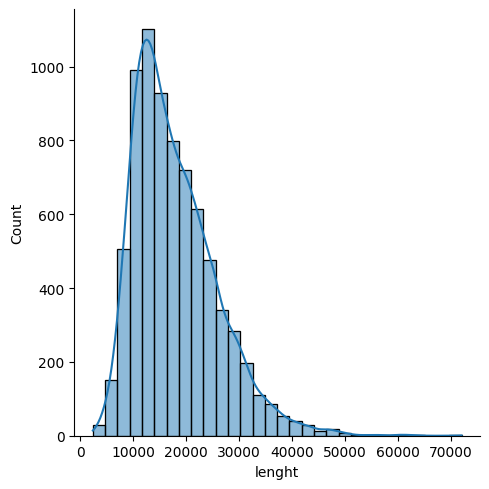

In [23]:
sns.displot(df['length'], bins=30, kde=True)

Comparing Value Distribution

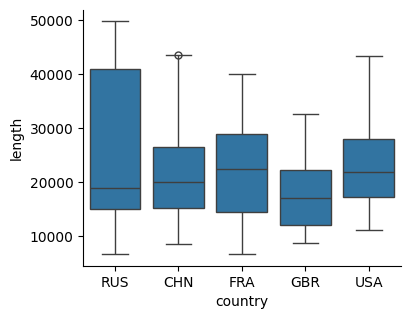

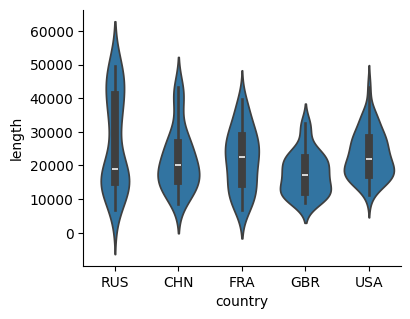

In [32]:
# distribution of speech elnght across UN P5
where = df['country'].isin(['USA', 'FRA', 'GBR', 'CHN', 'RUS'])
g = sns.catplot(data=df[where], x="country", y="length", kind='box')
g.fig.set_size_inches(4, 3) ###
g.fig.set_dpi(100) ###
g = sns.catplot(data=df[where], x="country", y="length", kind='violin')
g.fig.set_size_inches(4, 3) ###
g.fig.set_dpi(100) ###

visualizing development over time

<Axes: title={'center': 'Number of Speech per Year'}, xlabel='year'>

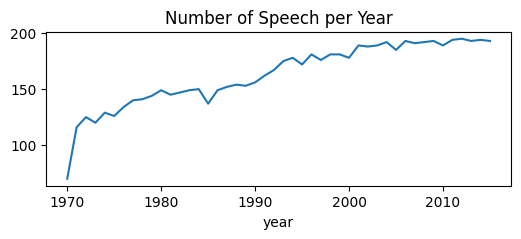

In [35]:
df.groupby('year').size().plot(title="Number of Speech per Year", figsize=(6,2))

<Axes: title={'center': 'Avg. Speech Length'}, xlabel='year'>

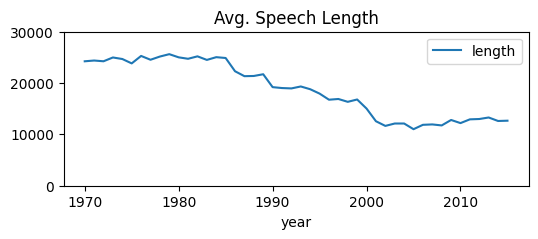

In [36]:
df.groupby('year').agg({'length': 'mean'}) \
  .plot(title="Avg. Speech Length", ylim=(0,30000), figsize=(6,2))

## Text Preprocessing Pipeline

Tokenization with Regular Expressions

In [38]:
import regex as re

def tokenize(text):
    return re.findall(r'[\w-]*\p{L}[\w-]*', text)

Stopwords

In [41]:
import nltk
stopwords = set(nltk.corpus.stopwords.words('english'))


In [42]:
def remove_stop(tokens):
    return [t for t in tokens if t.lower() not in stopwords]

In [43]:
include_stopwords = {'dear', 'regards', 'must', 'would', 'also'}
exclude_stopwords = {'against'}

stopwords |= include_stopwords
stopwords -= exclude_stopwords

In [44]:
pipeline = [str.lower, tokenize, remove_stop]

def prepare(text, pipeline):
    tokens = text
    for transform in pipeline:
        tokens = transform(tokens)
    return tokens